<font size="+5">#05. Neural Networks for Classification. Part II</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = train_images / 255

In [4]:
test_images = test_images / 255

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Get to Know the Data

### Visualize some Samples

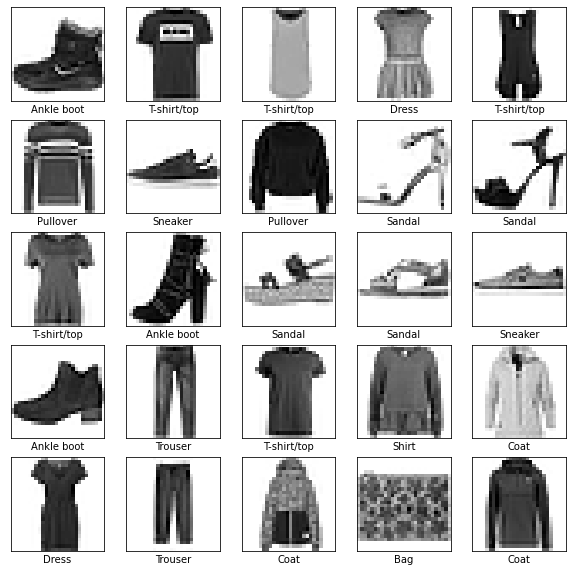

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Visualize One Sample/Row/Image/Explanatory Variables

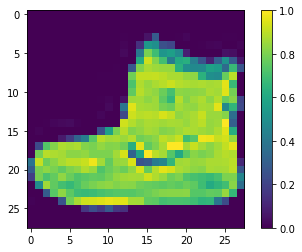

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Target Variable Value

In [8]:
idx_label = train_labels[0]

In [9]:
class_names[idx_label]

'Ankle boot'

# Neural Network Concepts in Python

## Initializing the `Weights`

> - https://keras.io/api/layers/initializers/

### How to `kernel_initializer` the weights?

In [25]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='zeros'))
model.add(layer=Dense(units=10, activation='sigmoid'))

#### Make a Prediction with the Neural Network

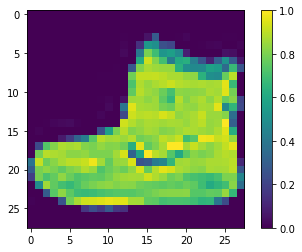

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
model.predict(train_images[:1])

2021-12-08 08:41:48.791918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32)

In [31]:
train_images[0].shape

(28, 28)

#### Observe the numbers for the `weights`

In [32]:
model.get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.16815712, -0.08479369,  0.00313778, ...,  0.17757808,
         -0.12224899, -0.20058408],
        [-0.00495636,  0.10777228, -0.014

#### Predictions vs Reality

> 1. Calculate the Predicted Accidents and
> 2. Compare it with the Real Total Accidents

In [33]:
y_pred = model.predict(x=train_images)

2021-12-08 08:41:52.315977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [34]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.1

#### `fit()` the `model` and compare again

In [35]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=5, verbose=1)

Epoch 1/5
  40/1875 [..............................] - ETA: 7s - loss: 1.2916 - accuracy: 0.5656

2021-12-08 08:42:01.642733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5747 - accuracy: 0.8004
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4706 - accuracy: 0.8379
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4499 - accuracy: 0.8433
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4390 - accuracy: 0.8477
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4325 - accuracy: 0.8500


##### Observe the numbers for the `weights`

In [37]:
model.get_weights()

[array([[ 0.01262794, -0.07235183, -0.05890276, ..., -0.01316265,
         -0.08308205,  0.04009127],
        [ 0.00549843,  0.08773462,  0.16600662, ...,  0.30853897,
          0.0292658 , -0.12737477],
        [ 0.2568191 , -0.17739968,  0.21349111, ...,  0.19939709,
         -0.2077511 ,  0.04225753],
        ...,
        [ 0.07291577,  0.0140919 ,  0.30256942, ...,  0.11012804,
          0.25168064, -0.1900128 ],
        [-0.09888133,  0.18241611,  0.15661585, ..., -0.03948403,
          0.10038608,  0.09632155],
        [-0.00588235,  0.00249761,  0.02130315, ...,  0.1068215 ,
         -0.01342028, -0.04438821]], dtype=float32),
 array([ 8.36721599e-01, -7.57207096e-01, -2.70251840e-01,  1.40401155e-01,
        -3.42149079e-01, -7.19205737e-02,  4.03707922e-02,  9.49395224e-02,
        -4.99330938e-01, -2.85865992e-01, -8.79709199e-02, -1.56701162e-01,
        -1.03847392e-01,  7.70579219e-01, -3.86096865e-01,  6.50259018e-01,
        -2.95662165e-01,  2.56071866e-01,  2.83532739e

##### Predictions vs Reality

In [38]:
y_pred_0 = model.predict(train_images)

2021-12-08 08:44:00.479662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [39]:
(y_pred_0.argmax(axis=1) == train_labels).mean()

0.8043666666666667

**DUDA**

### How to `kernel_initializer` the weights to 1?

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='ones'))
model.add(layer=Dense(units=10, activation=''))

In [26]:
model.predict(train_images[:1])

array([[ 4.3411255e-01, -2.6792584e+02,  9.1088391e+02, -2.2889404e+02,
        -9.4750031e+01,  2.8932135e+01,  8.2708752e+02,  3.3438254e+02,
        -3.2542776e+02,  3.4766045e+00]], dtype=float32)

In [27]:
model.get_weights()

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.08826406,  0.16263105,  0.02012938, ...,  0.14021538,
         -0.00793232,  0.20461954],
        [ 0.05370726,  0.05313306, -0.198

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=20, verbose=0)

##### Observe the numbers for the `weights`

In [30]:
model.get_weights()

[array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.9968483 , 1.0031446 , 1.0031561 , ..., 0.9968524 , 0.9968428 ,
         0.99685967],
        ...,
        [1.0031579 , 0.99684495, 0.9968402 , ..., 1.0031562 , 1.0031604 ,
         1.0031544 ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ]], dtype=float32),
 array([-0.00316221,  0.00316215,  0.00316223,  0.00316203, -0.00316223,
         0.00316129,  0.00316202,  0.00316224,  0.00316224,  0.00316212,
        -0.00316209, -0.00316217, -0.00316161,  0.00316216,  0.00316219,
         0.0031622 ,  0.00316216,  0.00316224,  0.00316205,  0.00316198,
        -0.00316219,  0.00316224, -0.00316221,  0.00316217,  0.00316214,
        -0.00316215,  0.00316

##### Predictions vs Reality

In [31]:
y_pred_1 = model.predict(train_images)

In [32]:
(y_pred_1.argmax(axis=1) == train_labels).mean()

0.1

### How to `kernel_initializer` the weights to `glorot_uniform` (default)?

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10))

In [34]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=20, verbose=0)

In [36]:
model.get_weights()

[array([[ 0.01846393, -0.0379024 , -0.05617009, ..., -0.00429757,
         -0.00729687, -0.06733049],
        [ 0.02408691,  0.03394849,  0.07220183, ..., -0.0174458 ,
          0.04772288, -0.02740894],
        [ 0.00437982, -0.07137024, -0.05348334, ..., -0.02992272,
          0.06892607,  0.00871389],
        ...,
        [-0.01683572,  0.0156422 ,  0.01965106, ..., -0.04940957,
         -0.02681533, -0.05010552],
        [-0.01066348,  0.03398761, -0.01577395, ...,  0.04767974,
          0.00524585, -0.04654354],
        [ 0.02462811, -0.05024676, -0.02828138, ...,  0.08805095,
          0.07972378, -0.07671308]], dtype=float32),
 array([ 0.11455462, -0.04023042, -0.05255942, -0.08492123,  0.19364037,
         0.02641021,  0.03101188,  0.01862315, -0.0047264 ,  0.14446114,
         0.30327967, -0.06952717,  0.07335798,  0.05892283, -0.04281834,
        -0.38252136, -0.13304189,  0.16279943,  0.02954265, -0.07916812,
         0.03262826, -0.12232847, -0.04205615, -0.09881783,  0.076

In [37]:
y_pred_gu = model.predict(train_images)

In [38]:
(y_pred_gu.argmax(axis=1) == train_labels).mean()

0.2206

## Play with the Activation Function

> - https://keras.io/api/layers/activations/

In [ ]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=558" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Use `sigmoid` activation in last layer

In [47]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='sigmoid'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [50]:
model.fit(train_images, train_labels, epochs=20, verbose=0)

#### Observe the numbers for the `weights`

> - Have they changed?

In [53]:
model.get_weights()

[array([[-0.08165538, -0.11404739,  0.08392645, ..., -0.17767496,
          0.16459806, -0.08080554],
        [ 0.09180481,  0.39056367,  0.07001241, ...,  0.2853875 ,
         -0.54619724,  0.29379538],
        [-1.0530962 ,  0.70816636,  0.01564271, ..., -0.8450439 ,
          0.26777664,  0.9299468 ],
        ...,
        [ 0.01284899,  0.52959245,  0.27627423, ...,  0.32778746,
          0.31263602, -0.37188756],
        [ 0.71570283,  0.29641026,  0.6569467 , ...,  0.09454423,
         -0.34068137, -0.49966252],
        [-0.0675257 ,  0.23990856,  0.39188293, ...,  0.29033428,
         -0.1504836 , -0.052435  ]], dtype=float32),
 array([-0.6409346 , -0.34632772, -0.1471256 , -0.36837563,  0.46848586,
        -0.60172   , -0.18010333, -0.21584187, -0.04929228,  0.80677074,
         0.24335334, -0.21066695,  0.7393299 ,  0.28046647, -0.22227982,
         0.9532877 , -0.7892022 ,  0.9236443 , -0.12750646, -0.6395903 ,
         0.14096831, -0.03770978, -0.00645039, -0.2179228 ,  0.546

#### Predictions vs Reality

In [51]:
y_pred_sg = model.predict(train_images)

In [52]:
(y_pred_sg.argmax(axis=1) == train_labels).mean()

0.8203833333333334

### Use `linear` activation in last layer

In [40]:
from tensorflow.keras.layers import Softmax

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='linear'))
model.add(layer=Softmax())

In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [44]:
model.fit(train_images, train_labels, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4951 - accuracy: 0.8290
Epoch 2/20
 615/1875 [========>.....................] - ETA: 5s - loss: 0.4707 - accuracy: 0.8388

KeyboardInterrupt: 

#### Observe the numbers for the `weights`

> - Have they changed?

In [57]:
model.get_weights()

[array([[-0.05406874, -0.06659503, -0.03099334, ..., -0.04476219,
         -0.00084785, -0.01048923],
        [-0.01659542, -0.07205512, -0.08023226, ..., -0.06533168,
          0.01025437,  0.04963673],
        [ 0.00221756, -0.01779846,  0.05384294, ...,  0.07403154,
          0.04350531,  0.01359456],
        ...,
        [ 0.03159964, -0.04746597, -0.05202576, ...,  0.00150411,
         -0.02631329,  0.0458314 ],
        [-0.07346854,  0.01457838, -0.05605099, ..., -0.06159669,
         -0.00162685,  0.03135625],
        [-0.008425  , -0.06302673, -0.03431119, ..., -0.03185721,
          0.03106357,  0.07534259]], dtype=float32),
 array([ 0.19667098,  0.04832911,  0.07265195,  0.1318618 , -0.09075976,
         0.00963534, -0.00554905, -0.14224936, -0.07717731, -0.07459544,
         0.04231536,  0.09814806,  0.06417536,  0.09410585, -0.08923193,
        -0.03220435, -0.13526009,  0.00092098,  0.10898107,  0.08412142,
        -0.02727068, -0.12780054, -0.07632679, -0.1103918 ,  0.112

#### Predictions vs Reality

In [58]:
y_pred_lr = model.predict(train_images)

In [59]:
(y_pred_lr.argmax(axis=1) == train_labels).mean()

0.21205

### Use `tanh` activation in last layer

In [60]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='tanh'))

In [61]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [62]:
model.fit(train_images, train_labels, epochs=20, verbose=0)

#### Observe the numbers for the `weights`

> - Have they changed?

In [63]:
model.get_weights()

[array([[-0.01374271, -0.06690766, -0.04386526, ...,  0.00693781,
          0.0605322 , -0.07264597],
        [ 0.02380414, -0.07427487,  0.06290578, ...,  0.03186726,
          0.00529817,  0.00730634],
        [ 0.05577704, -0.03879319,  0.06570279, ...,  0.03101898,
         -0.0590681 ,  0.07144766],
        ...,
        [ 0.02455996, -0.0252196 , -0.04369475, ..., -0.07389538,
         -0.0573963 ,  0.06272375],
        [ 0.06294866,  0.02372422, -0.04499459, ..., -0.07701334,
         -0.04711885,  0.05698971],
        [-0.01434757,  0.06118023, -0.01335074, ..., -0.03800943,
         -0.08159012, -0.04803829]], dtype=float32),
 array([ 9.73362289e-03, -2.16377806e-02, -6.42209779e-04, -4.95888200e-03,
         2.91927364e-02, -2.59706564e-02,  9.63252503e-03, -1.21356510e-02,
         6.57867733e-03, -8.89599323e-03, -7.81858806e-03,  1.01928227e-02,
        -6.74098264e-05, -8.03034566e-03,  8.73986538e-03, -1.78823657e-02,
        -8.79502762e-03, -1.53136738e-02,  1.22757601e

#### Predictions vs Reality

In [64]:
y_pred_th = model.predict(train_images)

In [65]:
(y_pred_th.argmax(axis=1) == train_labels).mean()

0.08228333333333333

### Use `relu` activation in last layer

In [66]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=10, activation='relu'))

In [67]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [68]:
model.fit(train_images, train_labels, epochs=20, verbose=0)

#### Observe the numbers for the `weights`

> - Have they changed?

In [69]:
model.get_weights()

[array([[-0.04466196, -0.07125098,  0.02745896, ..., -0.06688426,
          0.03986891, -0.00961462],
        [ 0.02199672, -0.05414483,  0.0498033 , ..., -0.03617295,
         -0.05281274, -0.07657111],
        [ 0.00198879, -0.00263326,  0.0192096 , ...,  0.06106538,
         -0.02871672, -0.00151388],
        ...,
        [ 0.00465394, -0.04106883, -0.04362278, ..., -0.013349  ,
          0.02256533, -0.04556652],
        [-0.00744962,  0.07543242, -0.06583543, ...,  0.05503389,
          0.03650399,  0.0193997 ],
        [-0.03004655,  0.06288514,  0.01378566, ...,  0.03365356,
         -0.02730027,  0.00140784]], dtype=float32),
 array([ 0.01728075,  0.0025922 ,  0.00089836, -0.00679635,  0.0089415 ,
         0.00498545,  0.00873493,  0.01603992, -0.01360645, -0.01322379,
        -0.0095386 , -0.00121518, -0.01078811,  0.01080607, -0.00108027,
         0.00980407, -0.0044155 , -0.0015805 , -0.00872886,  0.0123483 ,
        -0.01657577, -0.01135679, -0.01799245, -0.0097778 ,  0.010

#### Predictions vs Reality

In [70]:
y_pred_relu = model.predict(train_images)

In [71]:
(y_pred_relu.argmax(axis=1) == train_labels).mean()

0.1

### How are the predictions changing? Why?

## Optimizer

> - https://keras.io/api/optimizers/#available-optimizers

Optimizers comparison in GIF → https://mlfromscratch.com/optimizers-explained/#adam

Tesla's Neural Network Models is composed of 48 models trainned in 70.000 hours of GPU → https://tesla.com/ai

1 Year with a 8 GPU Computer → https://twitter.com/thirdrowtesla/status/1252723358342377472

### Use Gradient Descent `SGD`

In [90]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(layer=Dense(units=128, kernel_initializer='zeros'))
model.add(layer=Dense(units=10))

#### `compile()` the model

In [91]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### `fit()` the Model

In [93]:
history = model.fit(x=train_images, y=train_labels, epochs=20, verbose=0)

#### Predictions vs Reality

In [94]:
y_pred = model.predict(train_images)

In [95]:
(y_pred.argmax(axis=1) == train_labels).mean()

0.1

#### Observe the numbers for the `weights`

> - Have they changed?

In [96]:
model.get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.08585712,  0.09246223, -0.19580778, ...,  0.17920722,
          0.13153343, -0.05126631],
        [ 0.10831012,  0.14922391, -0.056


#### View History

In [97]:
import matplotlib.pyplot as plt

KeyError: 'val_loss'

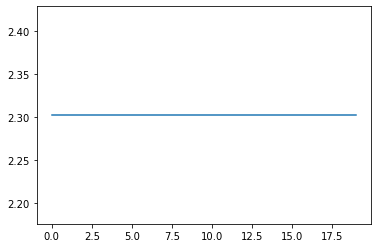

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Use `ADAM`

### Use `RMSPROP`

### Does it take different times to get the best accuracy? Why?

## Loss Functions

> - https://keras.io/api/losses/

### `binary_crossentropy`

### `sparse_categorical_crossentropy`

### `mean_absolute_error`

### `mean_squared_error`

## In the end, what should be a feasible configuration of the Neural Network for this data?

# Common Errors

## The `kernel_initializer` Matters

## The `activation` Function Matters

## The `optimizer` Matters

## The Number of `epochs` Matters

## The `loss` Function Matters

## The Number of `epochs` Matters

# Neural Network's importance to find **Non-Linear Patterns** in the Data

> - The number of Neurons & Hidden Layers

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Summary

- Mathematical Formula
- Weights / Kernel Initializer
- Loss Function
- Activation Function
- Optimizers

## What cannot you change arbitrarily of a Neural Network?

- Input Neurons
- Output Neurons
- Loss Functions
- Activation Functions